# Finding Patches

In [8]:
# imports
import numpy as np
import h5py

from matplotlib import pyplot as plt

# Load up

In [2]:
masks = h5py.File('mae_mask_t75_p75_small.h5', 'r')

In [4]:
masks['valid'].shape

(218596, 1, 64, 64)

## Check one

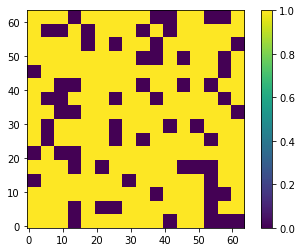

In [50]:
plt.clf()
img = plt.imshow(masks['valid'][0, 0, ...], origin='lower')
plt.colorbar(img)
plt.show()

In [11]:
mask0 = masks['valid'][0, 0, ...]
np.unique(mask0)

array([0., 1.], dtype=float32)

# Mask

In [64]:
mask = np.where(mask0 == 1.)
mask[0][0:30], mask[1][0:30]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]))

# Find the patches

In [65]:
p_sz = 4

In [66]:
idx = np.ravel_multi_index((mask[0], mask[1]), mask0.shape)
idx

array([   0,    1,    2, ..., 4093, 4094, 4095])

In [67]:
np.sum(mask0.flatten()[idx])

3072.0

# Patch finding

## Search and Record

In [73]:
flat_mask0 = mask0.flatten().astype(int)
patches = []
for ss in range(mask0.size):
    if flat_mask0[ss] == 1:
        patches.append(ss)
        # Fill in the patch
        i, j = np.unravel_index(ss, mask0.shape)
        #import pdb; pdb.set_trace()
        i_s = (i+np.arange(p_sz)).tolist() * p_sz
        j_s = []
        for kk in range(p_sz):
            j_s.extend([j+kk]*p_sz)
        f_idx = np.ravel_multi_index((i_s, j_s), mask0.shape)
        flat_mask0[f_idx] = 0

## Recreate

In [74]:
recon = np.zeros_like(mask0)
for patch in patches:
    i, j = np.unravel_index(patch, mask0.shape)
    #
    recon[i:i+p_sz, j:j+p_sz] = 1

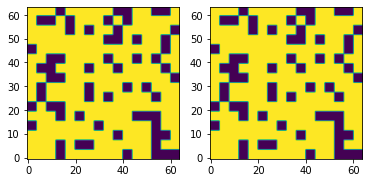

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(mask0, origin='lower')
ax2.imshow(recon, origin='lower')
#ax1.colorbar(img)
#
plt.show()